I want to try to get all the info from our dozens of languages, into one dataframe 

In [1]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

In [2]:
mypath = os.getcwd()
onlyXLfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f[-4:]=="xlsx" and f[:4] == "lang"]

In [3]:
type(onlyXLfiles)

list

In [4]:
dfs = {}
for f in onlyXLfiles:
    xl = pd.ExcelFile(f)
    dfs.update({f:pd.read_excel(xl, xl.sheet_names[0])})

In [5]:
dfs[list(dfs.keys())[0]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ספירה של flo-mon,תוויות עמודה,NaN,NaN,NaN,NaN,NaN,NaN,עמודה1,1.00,2.000000,3.000000,4.000000,5.000000
2,תוויות שורה,1,2.0,3.0,4.0,5.0,סכום כולל,NaN,Monotonicity,1.00,0.857143,0.640777,0.574257,0.605484
3,0,NaN,7.0,37.0,86.0,705.0,835,NaN,Conservativity,0.75,0.510204,0.485437,0.277228,0.156128
4,1,4,42.0,66.0,116.0,1082.0,1310,NaN,All,0.75,0.510204,0.349515,0.202970,0.133744
5,סכום כולל,4,49.0,103.0,202.0,1787.0,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ספירה של flo-con,תוויות עמודה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,תוויות שורה,1,2.0,3.0,4.0,5.0,סכום כולל,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(dfs)

24

In [7]:
inds = []
to_remove = []
for f,df in dfs.items():
    exists_mono = df.index[df.eq("Monotonicity").any(1)].tolist()
    if len(exists_mono) == 1:
        inds += [exists_mono]
    else: 
        to_remove += [f]
    

for f in to_remove:
    del dfs[f]

C:\Users\mimis\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
len(dfs)

20

In [161]:
tables = {}
for f,df in dfs.items():
    mono_loc = df.index[df.eq("Monotonicity").any(1)].tolist()[0]
    table = range(mono_loc-1,mono_loc+3)
    tables.update({f:df.iloc[table]})
    

C:\Users\mimis\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [162]:
tables[list(tables.keys())[0]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,ספירה של flo-mon,תוויות עמודה,NaN,NaN,NaN,NaN,NaN,NaN,עמודה1,1.00,2.000000,3.000000,4.000000,5.000000
2,תוויות שורה,1,2.0,3.0,4.0,5.0,סכום כולל,NaN,Monotonicity,1.00,0.857143,0.640777,0.574257,0.605484
3,0,NaN,7.0,37.0,86.0,705.0,835,NaN,Conservativity,0.75,0.510204,0.485437,0.277228,0.156128
4,1,4,42.0,66.0,116.0,1082.0,1310,NaN,All,0.75,0.510204,0.349515,0.202970,0.133744


In [163]:
for lang, table in tables.items():
    for col in table.columns:
        if "Monotonicity" in table[col].values:
            tables[lang] = table.drop(["Unnamed: "+str(i) for i in range(int(table.columns[-1][-2:])) if (i<int(col[-2:]) and "Unnamed: "+str(i) in table.columns) ],axis="columns")


C:\Users\mimis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
tables[list(tables.keys())[9]]

,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
4,עמודה1,1.00,2.000000,3.000000,4.000000,5.000000
5,Monotonicity,1.00,0.857143,0.634615,0.572864,0.544955
6,Quantity,1.00,1.000000,1.000000,1.000000,1.000000
7,Conservativity,0.75,0.510204,0.480769,0.281407,0.161977


In [165]:
for lang, table in tables.items():
    tables[lang] = table.reset_index()
    tables[lang].columns = range(tables[lang].columns.size)

In [166]:
for lang, table in tables.items():
    tables[lang] = table.reset_index()
    tables[lang] = tables[lang].drop([0],axis="columns")

In [167]:
import numpy as np

In [168]:
tables_concat = pd.concat(tables)

In [189]:
tables_concat =(tables_concat.drop([0],axis="columns"))

In [200]:
to_drop = tables_concat.iloc[0,0] #עמודה1

In [215]:
tables_concat = tables_concat[tables_concat[1]!=to_drop]

In [221]:
d = {}
for i in range(tables_concat.columns.size):
    d.update({i+1:i})


In [222]:
d

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}

In [225]:
tables_concat = tables_concat.rename(d,axis='columns')

In [340]:
tables_concat.to_csv("tables_all_20_langs_concat.csv")

In [232]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [254]:
row_titles = ["Monotonicity","Conservativity","All"]
col_titles = list(range(1,6))

x = {}

for r in row_titles:
    mid = {}
    for c in col_titles:
        mid.update({c:tables_concat.loc[tables_concat[0] == r,c].mean()})
    x.update({r:mid})
        

In [255]:
x

{'Monotonicity': {1: 1.0,
  2: 0.8680256376371085,
  3: 0.6498525684985846,
  4: 0.5558497233580473,
  5: 0.602443273785769},
 'Conservativity': {1: 0.8,
  2: 0.5228325372702272,
  3: 0.45662317631234906,
  4: 0.30681674828263106,
  5: 0.16395292913503293},
 'All': {1: 0.8088235294117647,
  2: 0.5250610882650931,
  3: 0.37149675750703304,
  4: 0.1887216333787356,
  5: 0.13910848595509842}}

In [243]:
tables_concat.loc[tables_concat[0] == row_titles[0],col_titles[0]].mean()

1.0

In [256]:
import matplotlib.pyplot as plt

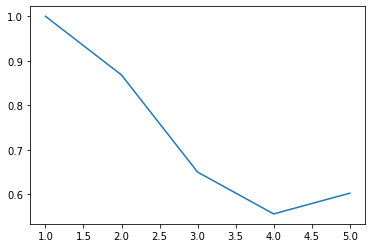

In [260]:
plt.plot(list(x["Monotonicity"].keys()),list(x["Monotonicity"].values()))

Text(27.0, 0.5, '% of quantifiers in a language in this length')

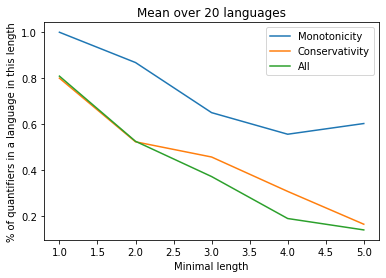

In [279]:
for title in row_titles:
    plt.plot(list(x[title].keys()),list(x[title].values()),label=title)
    
    
plt.title("Mean over 20 languages")
plt.savefig("mean over 20 langs.png")
plt.legend()
plt.xlabel("Minimal length")
plt.ylabel("% of quantifiers in a language in this length")


In [280]:
import numpy as np

#2ca02c
#2ca02c
#2ca02c
<class 'function'>


Text(27.0, 0.5, '% of quantifiers in a language in this length')

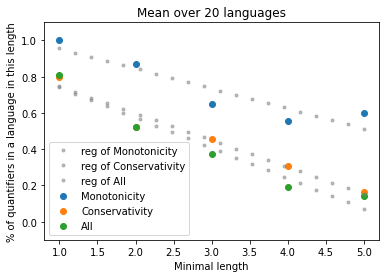

In [339]:
for title in row_titles:
    plt.scatter(list(x[title].keys()),list(x[title].values()),label=title)
    color = (line.get_color())
    print(color)
    a,b = np.polyfit(list(x[title].keys()), list(x[title].values()), deg=1)
    xnums = np.linspace(1, 5, num=20)
    plt.plot(xnums,a*xnums+b,'.',label = "reg of "+title,color="gray",alpha=0.5)
    
ax = plt.gca()
ax.set_ylim([-0.1,1.1])
plt.title("Mean over 20 languages")
plt.savefig("mean over 20 langs.png")
plt.legend()
plt.xlabel("Minimal length")
plt.ylabel("% of quantifiers in a language in this length")

